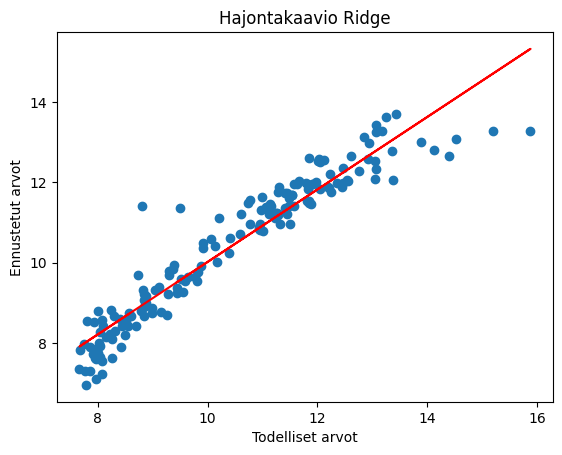

Mean Squared Error: 0.3272609218326174
Mean Absolute Error: 0.3923510329443616
R^2 Score: 0.9087636020080431


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

file_path = r'../data/final_df.csv'

columns = ['day','TotEnergyPerDay','HouseCount','temperatureMax','windBearing','dewPoint','cloudCover','windSpeed','pressure','apparentTemperatureHigh','visibility','humidity','apparentTemperatureLow','apparentTemperatureMax','uvIndex','temperatureLow','temperatureMin','temperatureHigh','apparentTemperatureMin','moonPhase','holiday','AvgEnergyPerDay','month','date']

df = pd.read_csv(file_path,skiprows=1, names = columns)

# Divide by variables and drop target
X = df.drop('AvgEnergyPerDay', axis=1)
y = df['AvgEnergyPerDay']

# Split dataset 80/20
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X, y, test_size=0.2, random_state=42)

# Copies of Dataframes
X_train_ridge_copy = X_train_ridge.copy()
X_test_ridge_copy = X_test_ridge.copy()

# Convert 'day' column to datetime objects in both training and test data
X_train_ridge_copy['day'] = pd.to_datetime(X_train_ridge_copy['day'])
X_test_ridge_copy['day'] = pd.to_datetime(X_test_ridge_copy['day'])

# Create a new column containing the number of days from a given departure date (e.g. 2000-01-01)
X_train_ridge_copy['day_numeric'] = (X_train_ridge_copy['day'] - pd.Timestamp('2000-01-01')).dt.days
X_test_ridge_copy['day_numeric'] = (X_test_ridge_copy['day'] - pd.Timestamp('2000-01-01')).dt.days

# Delete the original 'day' column in both training and test data
X_train_ridge_copy = X_train_ridge_copy.drop(columns='day')
X_test_ridge_copy = X_test_ridge_copy.drop(columns='day')

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ridge_copy)
X_test_scaled = scaler.transform(X_test_ridge_copy)

# Ridge-model
ridge_model = Ridge(alpha=1.0)

# Test the model
y_pred_ridge = ridge_model.fit(X_train_scaled, y_train_ridge).predict(X_test_scaled)

# Scatter plot
plt.scatter(y_test_ridge, y_pred_ridge)
plt.xlabel('Todelliset arvot')
plt.ylabel('Ennustetut arvot')
plt.title('Hajontakaavio Ridge')

m, b = np.polyfit(y_test_ridge, y_pred_ridge, 1)
plt.plot(y_test_ridge, m*y_test_ridge + b, color='red')

plt.show()

# Calculate the metrics
mse = mean_squared_error(y_test_ridge, y_pred_ridge)
mae = mean_absolute_error(y_test_ridge, y_pred_ridge)
r2 = r2_score(y_test_ridge, y_pred_ridge)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
